<a target="_blank" href="https://colab.research.google.com/github/fbenitachen/projects/blob/main/statistical_analysis_implementations.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Statistical Analysis Implementation in Python 📊
The notebook is in two parts, the first part is descriptive statistics that is essential for obtaining a quick overview of datasets. The second is probability distributions that enable us to quantify uncertainty and make informed predictions about future events based on past data.

#### <ins>Created by: Felice Benita</ins>

#### Dataset: E-Commerce Product Sales


##### Context

You're working with an E-Commerce Product Sales datasets. The goal is to implement statistics in Python: find the descriptive statistics and the probability distributions of this datasets.

##### Data Structure
Product_ID: Unique product identifier.<br/>
Product_Category: Product category, chosen randomly among common e-commerce categories.<br/>
Units_Sold: Generated with a Poisson distribution, simulating an average sale rate.<br/>
Revenue: Random revenue values between \\$5 and \$500, rounded to two decimal places.<br/>
Discount_Percentage: Discount rates applied, in common retail percentages.<br/>
Return_Rate: Percentage of returned units, between 0% and 30%.<br/>
Customer_Rating: Customer rating on a 1 to 5 scale.<br/>
Days_in_Inventory: Days since the product was first listed, from 1 to 365.<br/>
Sales_Channel: Sales channel, where 70% of sales occur online and 30% in-store<br/>
This dataset will allow you to explore trends in sales performance, analyze revenue and return rates by product category, and examine customer satisfaction metrics.


#### Retrieving Data
------

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

In [ ]:
# Reading data
df = pd.read_csv('File Dirr/ecommerce_product_sales.csv')
df.head()

,Product_ID,Product_Category,Units_Sold,Revenue,Discount_Percentage,Return_Rate,Customer_Rating,Days_in_Inventory,Sales_Channel
0,P0001,Beauty,39,207.04,50,0.12,2.7,91,In-Store
1,P0002,Books,44,12.62,20,0.04,2.9,141,In-Store
2,P0003,Home & Kitchen,43,293.55,25,0.20,4.7,289,Online
3,P0004,Books,38,130.29,0,0.22,3.6,218,Online
4,P0005,Books,40,227.88,15,0.17,2.2,77,Online


In [ ]:
# Look at the dimension of the data
print(f'Data contain {df.shape[0]} records and {df.shape[1]} columns.')

Data contain 1000 records and 9 columns.


In [ ]:
# Check the number of missing values in each column
df.isna().sum()

Product_ID             0
Product_Category       0
Units_Sold             0
Revenue                0
Discount_Percentage    0
Return_Rate            0
Customer_Rating        0
Days_in_Inventory      0
Sales_Channel          0
dtype: int64

In [ ]:
# Check the unique values
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
Product_ID,1000
Product_Category,6
Units_Sold,43
Revenue,984
Discount_Percentage,8
Return_Rate,31
Customer_Rating,41
Days_in_Inventory,340
Sales_Channel,2


#### Descriptive Statistics
------

In [ ]:
# Calculate the mean of each relevant numerical column
# (this time, we only use Units_Sold, Revenue, and Customer_Rating column)
mean_units_sold = df["Units_Sold"].mean()
mean_revenue = df["Revenue"].mean()
mean_customer_rating = df["Customer_Rating"].mean()

In [ ]:
# Display the results
print("Mean Units Sold:", round(mean_units_sold,2))
print("Mean Revenue:", round(mean_revenue,2))
print("Mean Customer Rating:", round(mean_customer_rating,2))

Mean Units Sold: 49.89
Mean Revenue: 249.15
Mean Customer Rating: 2.99


In [ ]:
# Calculate the median of Units_Sold, Revenue, and Customer_Rating
median_units_sold = df["Units_Sold"].median()
median_revenue = df["Revenue"].median()
median_customer_rating = df["Customer_Rating"].median()

In [ ]:
# Display the results
print("Median Units Sold:", round(median_units_sold,2))
print("Median Revenue:", round(median_revenue,2))
print("Median Customer Rating:", round(median_customer_rating,2))

Median Units Sold: 50.0
Median Revenue: 246.34
Median Customer Rating: 3.0


In [ ]:
# Calculate the mode of Units_Sold, Revenue, and Customer_Rating
mode_units_sold = df["Units_Sold"].mode()[0]  # [0] to get the first mode in case of multiple
mode_revenue = df["Revenue"].mode()[0]
mode_customer_rating = df["Customer_Rating"].mode()[0]

In [ ]:
# Display the results
print("Mode Units Sold:", mode_units_sold)
print("Mode Revenue:", mode_revenue)
print("Mode Customer Rating:", mode_customer_rating)

Mode Units Sold: 52
Mode Revenue: 113.26
Mode Customer Rating: 1.8


In [ ]:
# Calculate the variance of Units_Sold, Revenue, and Customer_Rating
variance_units_sold = df["Units_Sold"].var()
variance_revenue = df["Revenue"].var()
variance_customer_rating = df["Customer_Rating"].var()

In [ ]:
# Display the results
print("Variance of Units Sold:", round(variance_units_sold,2))
print("Variance of Revenue:", round(variance_revenue,2))
print("Variance of Customer Rating:", round(variance_customer_rating,2))

Variance of Units Sold: 51.62
Variance of Revenue: 20187.16
Variance of Customer Rating: 1.36


In [ ]:
# Calculate the standard deviation of Units_Sold, Revenue, and Customer_Rating
std_units_sold = df["Units_Sold"].std()
std_revenue = df["Revenue"].std()
std_customer_rating = df["Customer_Rating"].std()

In [ ]:
# Display the results
print("Standard Deviation of Units Sold:", round(std_units_sold,2))
print("Standard Deviation of Revenue:", round(std_revenue,2))
print("Standard Deviation of Customer Rating:", round(std_customer_rating,2))

Standard Deviation of Units Sold: 7.18
Standard Deviation of Revenue: 142.08
Standard Deviation of Customer Rating: 1.17


In [ ]:
# Calculate the range (max - min) for Units_Sold, Revenue, and Customer_Rating column, rounded to 2 decimal places
range_units_sold = df["Units_Sold"].max() - df["Units_Sold"].min()
range_revenue = df["Revenue"].max() - df["Revenue"].min()
range_customer_rating = df["Customer_Rating"].max() - df["Customer_Rating"].min()

In [ ]:
# Display the results
print("Range of Units Sold:", round(range_units_sold,2))
print("Range of Revenue:", round(range_revenue,2))
print("Range of Customer Rating:", round(range_customer_rating,2))

Range of Units Sold: 42
Range of Revenue: 494.46
Range of Customer Rating: 4.0


In [ ]:
# Define the percentiles we want to calculate
percentiles = [0.25, 0.5, 0.75]

# Calculate percentiles for Units_Sold, Revenue, and Customer_Rating colum
percentiles_units_sold = df["Units_Sold"].quantile(percentiles).round(2)
percentiles_revenue = df["Revenue"].quantile(percentiles).round(2)
percentiles_customer_rating = df["Customer_Rating"].quantile(percentiles).round(2)

In [ ]:
# Display the results
print("Percentiles for Units Sold:\n", percentiles_units_sold)
print("Percentiles for Revenue:\n", percentiles_revenue)
print("Percentiles for Customer Rating:\n", percentiles_customer_rating)

Percentiles for Units Sold:
 0.25    45.0
0.50    50.0
0.75    55.0
Name: Units_Sold, dtype: float64
Percentiles for Revenue:
 0.25    124.42
0.50    246.34
0.75    374.94
Name: Revenue, dtype: float64
Percentiles for Customer Rating:
 0.25    2.0
0.50    3.0
0.75    4.0
Name: Customer_Rating, dtype: float64


In [ ]:
# Calculate summary statistics for each numerical column
summary_statistics = df.describe().round(2)

# Display the results
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
        Units_Sold  Revenue  Discount_Percentage  Return_Rate  Customer_Rating  \
count     1000.00  1000.00              1000.00      1000.00          1000.00   
mean        49.89   249.15                19.24         0.15             2.99   
std          7.18   142.08                14.46         0.09             1.17   
min         30.00     5.32                 0.00         0.00             1.00   
25%         45.00   124.42                10.00         0.08             2.00   
50%         50.00   246.34                17.50         0.14             3.00   
75%         55.00   374.94                25.00         0.22             4.00   
max         72.00   499.78                50.00         0.30             5.00   

       Days_in_Inventory  
count            1000.00  
mean              185.62  
std               105.61  
min                 1.00  
25%                92.00  
50%               188.00  
75%               280.00  
max               364.00  


#### Probability Distributions
------

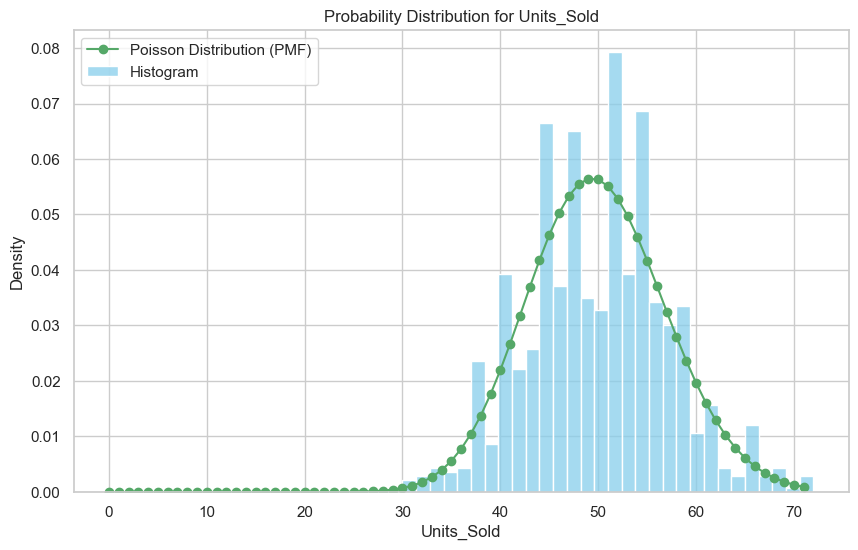

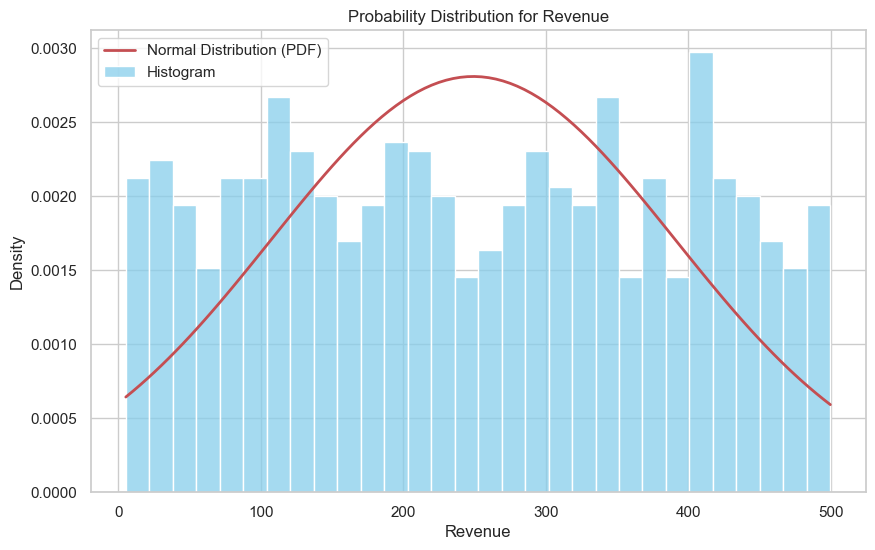

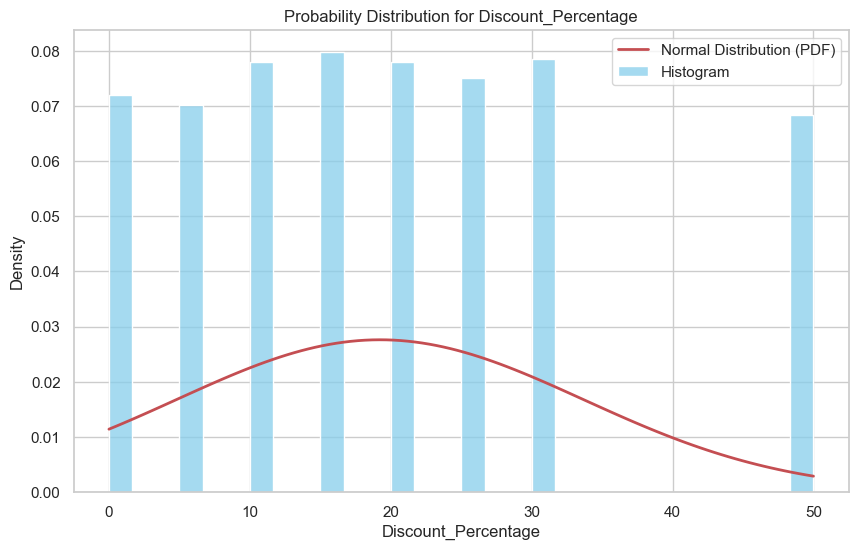

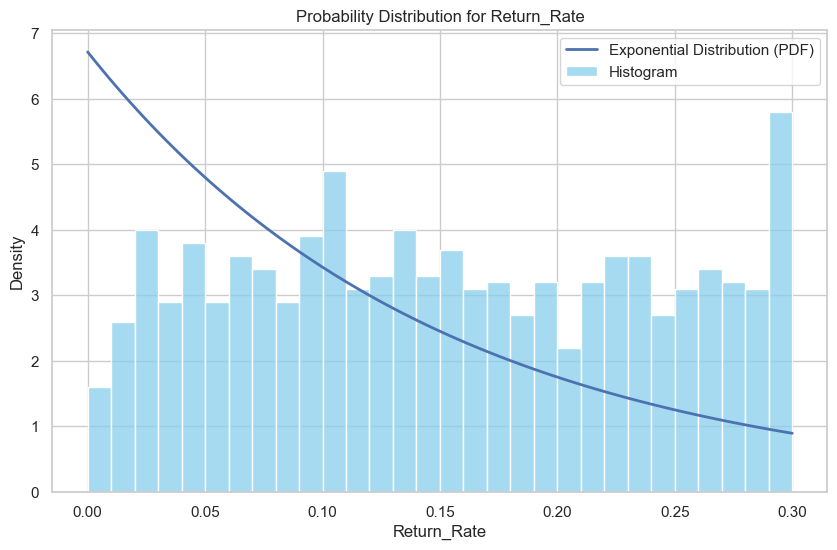

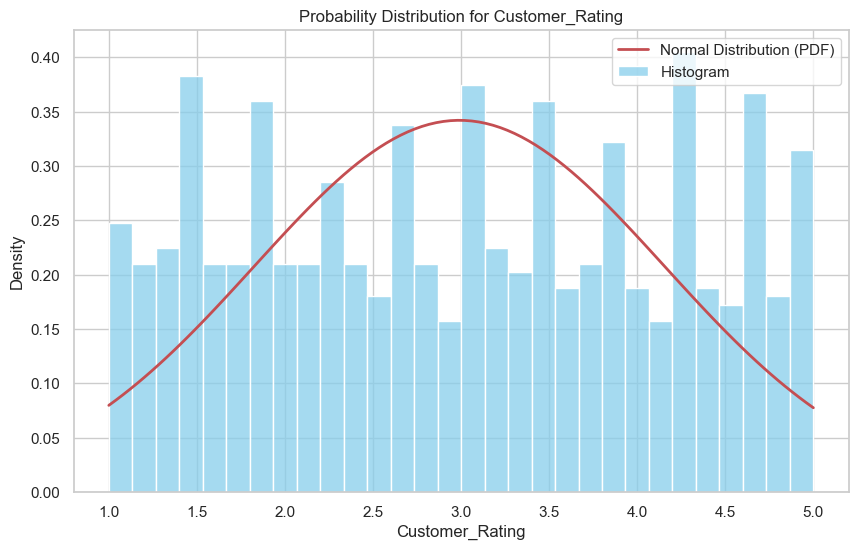

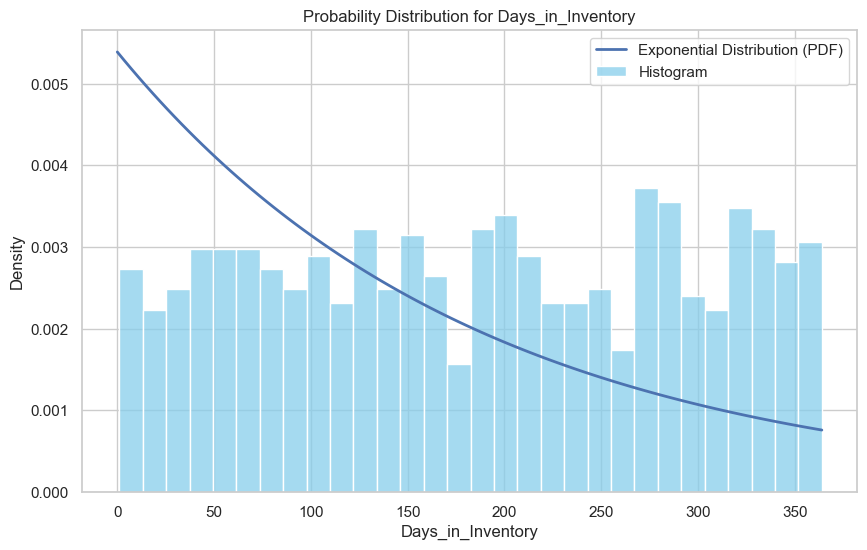

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson, expon

# Set the style of seaborn plots
sns.set(style="whitegrid")

# Function to plot probability distribution for a column
def plot_distribution(column, dist_type='normal'):
    plt.figure(figsize=(10, 6))

    # Plot histogram of the data
    sns.histplot(df[column], kde=False, bins=30, color="skyblue", stat="density", label="Histogram")

    # Fit and plot different types of probability distributions
    if dist_type == 'normal':
        mu, std = norm.fit(df[column])
        xmin, xmax = df[column].min(), df[column].max()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'r', linewidth=2, label="Normal Distribution (PDF)")

    elif dist_type == 'poisson':
        lambda_param = df[column].mean()
        x = np.arange(0, df[column].max())
        p = poisson.pmf(x, lambda_param)
        plt.plot(x, p, 'g', marker='o', linestyle='-', label="Poisson Distribution (PMF)")

    elif dist_type == 'exponential':
        lambda_param = 1 / df[column].mean()
        x = np.linspace(0, df[column].max(), 100)
        p = expon.pdf(x, scale=1/lambda_param)
        plt.plot(x, p, 'b', linewidth=2, label="Exponential Distribution (PDF)")

    # Labels and title
    plt.title(f"Probability Distribution for {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Plot probability distributions for each relevant numerical column
plot_distribution("Units_Sold", dist_type="poisson")
plot_distribution("Revenue", dist_type="normal")
plot_distribution("Discount_Percentage", dist_type="normal")
plot_distribution("Return_Rate", dist_type="exponential")
plot_distribution("Customer_Rating", dist_type="normal")
plot_distribution("Days_in_Inventory", dist_type="exponential")

##### - Example of Each Probability Distributions -
------

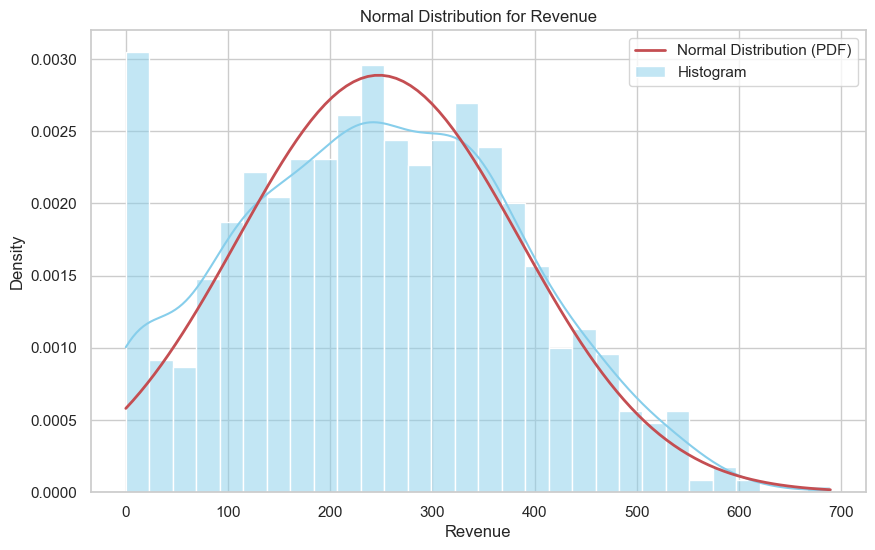

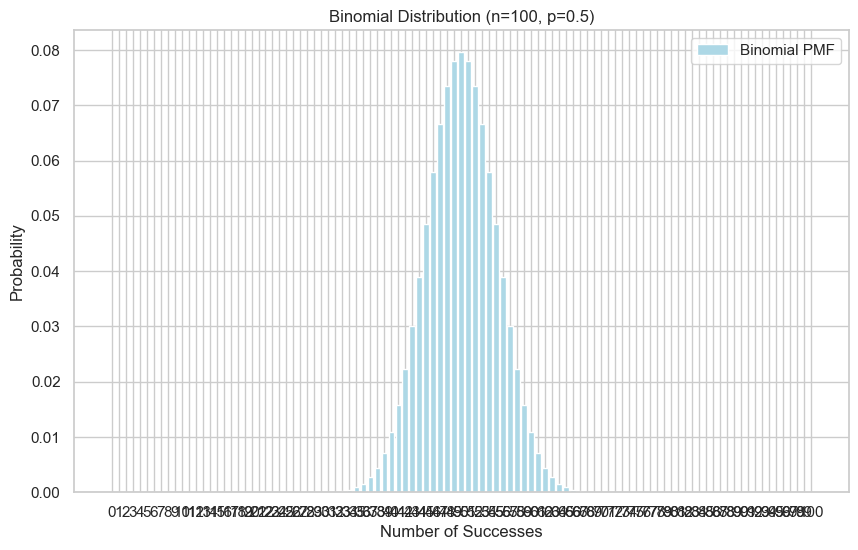

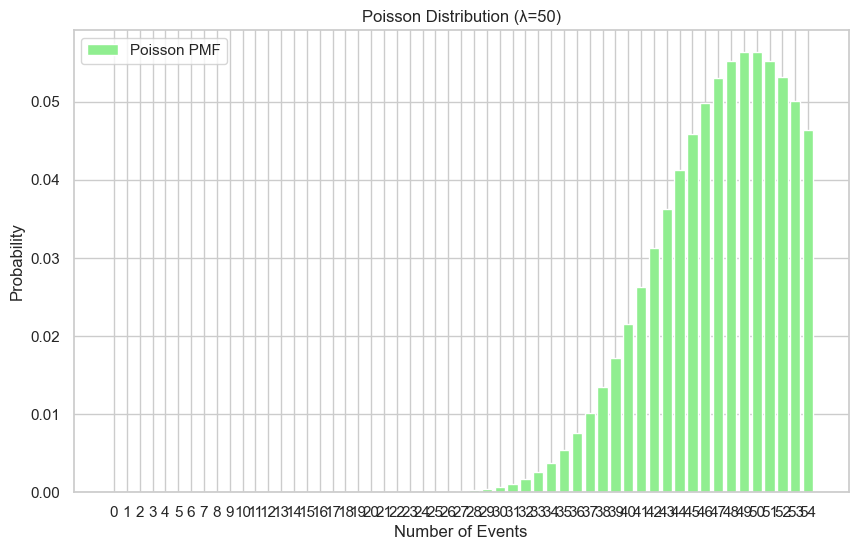

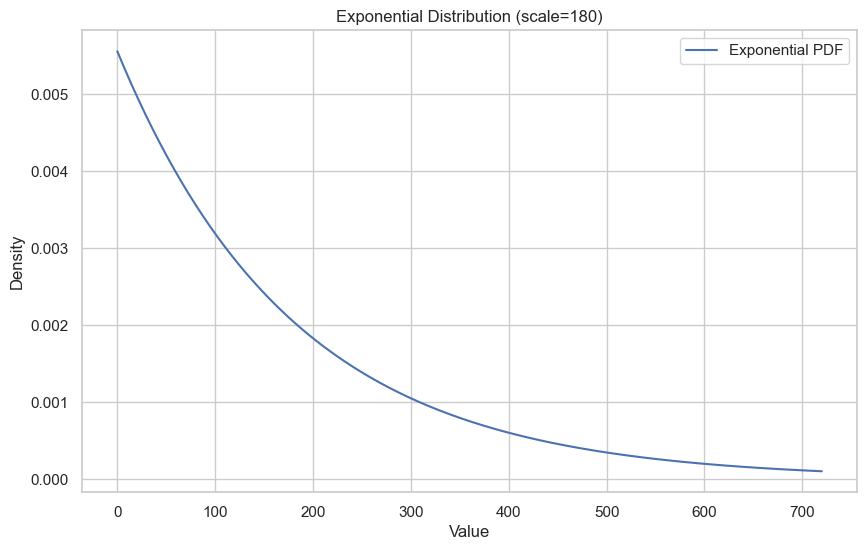

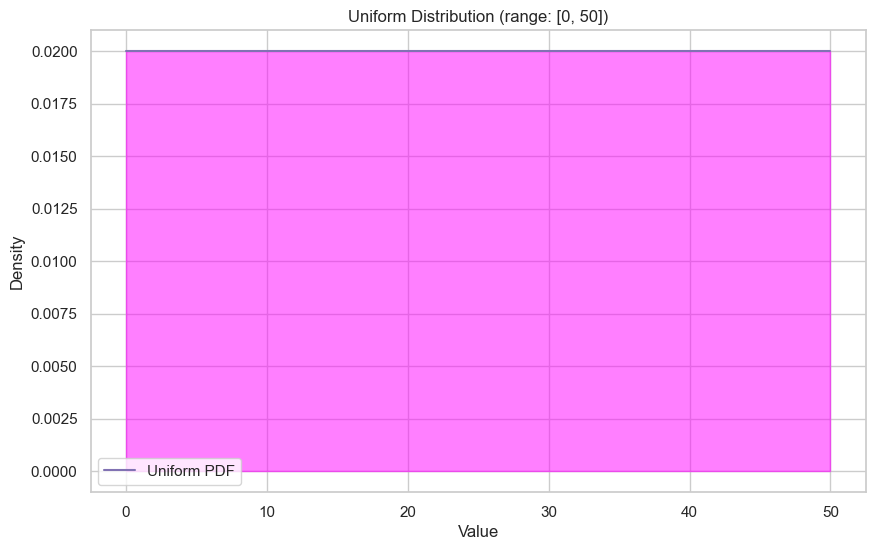

In [ ]:
# Example of each Probability Distributions

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, poisson, expon, uniform

# Generate the dataset
np.random.seed(0)
n = 1000
product_categories = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports', 'Toys']
sales_channels = ['Online', 'In-Store']

data = {
    'Units_Sold': np.random.poisson(lam=50, size=n),
    'Revenue': np.random.normal(loc=250, scale=150, size=n).clip(0),  # Clip to avoid negative revenue
    'Discount_Percentage': np.random.uniform(0, 50, size=n),
    'Return_Rate': np.random.uniform(0, 0.3, size=n),
    'Customer_Rating': np.random.uniform(1, 5, size=n),
    'Days_in_Inventory': np.random.exponential(scale=180, size=n).astype(int),
    'Product_Category': np.random.choice(product_categories, size=n),
    'Sales_Channel': np.random.choice(sales_channels, size=n),
}

df = pd.DataFrame(data)

# Set the style of seaborn plots
sns.set(style="whitegrid")

# Function to plot distributions
def plot_normal_distribution(column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, stat="density", bins=30, color="skyblue", label="Histogram")

    # Fit a normal distribution
    mu, std = norm.fit(df[column])
    xmin, xmax = df[column].min(), df[column].max()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2, label="Normal Distribution (PDF)")

    plt.title(f"Normal Distribution for {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

def plot_binomial_distribution(n_trials, p_success):
    x = np.arange(0, n_trials + 1)
    pmf = binom.pmf(x, n_trials, p_success)

    plt.figure(figsize=(10, 6))
    plt.bar(x, pmf, color='lightblue', label='Binomial PMF')
    plt.title(f"Binomial Distribution (n={n_trials}, p={p_success})")
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability')
    plt.xticks(x)
    plt.legend()
    plt.show()

def plot_poisson_distribution(lam):
    x = np.arange(0, lam + 5)
    pmf = poisson.pmf(x, lam)

    plt.figure(figsize=(10, 6))
    plt.bar(x, pmf, color='lightgreen', label='Poisson PMF')
    plt.title(f"Poisson Distribution (λ={lam})")
    plt.xlabel('Number of Events')
    plt.ylabel('Probability')
    plt.xticks(x)
    plt.legend()
    plt.show()

def plot_exponential_distribution(scale):
    x = np.linspace(0, scale * 4, 100)
    pdf = expon.pdf(x, scale=scale)

    plt.figure(figsize=(10, 6))
    plt.plot(x, pdf, 'b', label='Exponential PDF')
    plt.title(f"Exponential Distribution (scale={scale})")
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

def plot_uniform_distribution(low, high):
    x = np.linspace(low, high, 100)
    pdf = uniform.pdf(x, loc=low, scale=high-low)

    plt.figure(figsize=(10, 6))
    plt.plot(x, pdf, 'm', label='Uniform PDF')
    plt.fill_between(x, pdf, alpha=0.5, color='magenta')
    plt.title(f"Uniform Distribution (range: [{low}, {high}])")
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Calculate and plot each distribution
plot_normal_distribution("Revenue")
plot_binomial_distribution(n_trials=100, p_success=0.5)  # Example parameters for binomial distribution
plot_poisson_distribution(lam=50)  # Example parameter for Poisson distribution
plot_exponential_distribution(scale=180)  # Example scale for Exponential distribution
plot_uniform_distribution(low=0, high=50)  # Example range for Uniform distribution


<br/>
<span style="color: #191970; font-size: 16px; font-weight:bold;">Created by: Felice Benita</span>